I'm curious how team play in clutch time compares to their overall performance. 

Clutch time in the NBA is defined as the final 5 minutes of a game when the score is less than 5.

In [1]:
from nba_api.stats.endpoints import LeagueDashTeamClutch

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')


the official nba API doesn't seem to have this data... 


In [ ]:
## copy/pasted, with some tweaks, from a previous notebook

import requests
import time

## these should be the urls for advanced statistics, per 100 possessions

def clutch_url(season="2025-26", season_type="Regular Season"):
    url = """https://stats.nba.com/stats/leaguedashteamclutch?AheadBehind=Ahead%20or%20Behind&ClutchTime=Last%205%20Minutes""" + \
            """&College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0""" + \
            """&LeagueID=00&Location=&MeasureType=Advanced&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Per100Possessions&Period=0""" + \
            f"""&PlayerExperience=&PlayerPosition=&PlusMinus=N&PointDiff=5&Rank=N&Season={season}&SeasonSegment=&SeasonType={season_type}&ShotClockRange=""" + \
            """&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="""
    
    return url

def overall_url(season="2025-26", season_type="Regular Season"):
    url = "https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=" + \
        "&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Advanced&Month=0" + \
        "&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Per100Possessions&Period=0&PlayerExperience=&" + \
        f"PlayerPosition=&PlusMinus=N&Rank=N&Season={season}&SeasonSegment=&SeasonType={season_type}" + \
        "&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision="
    return url



headers = {
    'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:145.0) Gecko/20100101 Firefox/145.0",
    'Referer' : "https://www.nba.com",
    'Origin'  : "https://www.nba.com",
    "Sec-GPC" : "1",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-site"
}

def nba_scrape_request(url):
    r = requests.get(url, headers=headers)
    req_json =  r.json()['resultSets'][0]
    df = pd.DataFrame(req_json['rowSet'], columns=req_json['headers'])
    return df


def fetch_seasons(url_func, start_year=15, end_year=26, season_type='Regular Season'):
    years = [x for x in range(start_year, end_year)]

    dataframes = []
    for year in years:
        year_param = "20%d-%d" % (year, year+1)
        url = url_func(year_param, season_type)

        df = nba_scrape_request(url)
        df['SEASON'] = year
        dataframes.append(df)
        print(f"did {year_param}")
        time.sleep(2)

    df = pd.concat(dataframes, ignore_index=True)
    return df

these requests take some time...

In [120]:
clutch_data = fetch_seasons(clutch_url, 10, 26)

did 2010-11
did 2011-12
did 2012-13
did 2013-14
did 2014-15
did 2015-16
did 2016-17
did 2017-18
did 2018-19
did 2019-20
did 2020-21
did 2021-22
did 2022-23
did 2023-24
did 2024-25
did 2025-26


In [121]:
overall_data = fetch_seasons(overall_url, 10, 26)

did 2010-11
did 2011-12
did 2012-13
did 2013-14
did 2014-15
did 2015-16
did 2016-17
did 2017-18
did 2018-19
did 2019-20
did 2020-21
did 2021-22
did 2022-23
did 2023-24
did 2024-25
did 2025-26


this is sometimes erroring out (due to uncached query timeout?) I had to run it a few times to get all the years.

In [ ]:
playoff_overall = fetch_seasons(overall_url, 10, 26, 'Playoffs')

did 2010-11
did 2011-12
did 2012-13
did 2013-14
did 2014-15
did 2015-16
did 2016-17
did 2017-18
did 2018-19
did 2019-20
did 2020-21
did 2021-22
did 2022-23
did 2023-24
did 2024-25
did 2025-26


C:\Users\casey\AppData\Local\Temp\ipykernel_6044\2898533118.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dataframes, ignore_index=True)


In [69]:
playoff_overall

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,SEASON
0,1610612737,Atlanta Hawks,10,4,6,0.400,485.0,100.8,103.2,101.6,...,3,14,10,9,13,8,8,5,7,15
1,1610612738,Boston Celtics,6,2,4,0.333,293.0,91.3,94.3,97.7,...,9,8,1,7,12,13,14,4,12,15
2,1610612766,Charlotte Hornets,7,3,4,0.429,336.0,96.4,98.8,106.5,...,16,16,9,14,2,14,13,10,13,15
3,1610612739,Cleveland Cavaliers,21,16,5,0.762,1008.0,112.5,114.6,103.5,...,5,3,2,2,7,1,1,11,2,15
4,1610612742,Dallas Mavericks,5,1,4,0.200,240.0,99.3,101.7,117.7,...,6,13,15,16,5,10,10,9,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1610612749,Milwaukee Bucks,5,1,4,0.200,245.0,109.9,111.1,117.2,...,4,16,1,8,5,5,8,5,13,24
156,1610612750,Minnesota Timberwolves,15,9,6,0.600,720.0,110.1,113.6,109.2,...,3,2,9,5,13,4,4,8,5,24
157,1610612752,New York Knicks,18,10,8,0.556,874.0,109.6,112.7,109.9,...,15,4,8,6,6,10,10,9,8,24
158,1610612760,Oklahoma City Thunder,23,16,7,0.696,1109.0,112.2,114.3,103.6,...,9,11,12,12,1,9,7,2,1,24


https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&Height=&ISTRound=&LastNGames=0&LeagueID=00&Location=&MeasureType=Advanced&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2016-17&SeasonSegment=&SeasonType=Playoffs&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=

In [13]:
overall_data.sample(1)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,DEF_RATING,DREB,DREB_PCT,...,DEF_RATING_RANK,DREB_RANK,DREB_PCT_RANK,STL_RANK,BLK_RANK,OPP_PTS_OFF_TOV_RANK,OPP_PTS_2ND_CHANCE_RANK,OPP_PTS_FB_RANK,OPP_PTS_PAINT_RANK,SEASON
100,1610612745,Houston Rockets,82,53,29,0.646,48.8,110.1,32.1,0.7,...,17,28,29,4,16,17,23,18,30,18


In [24]:
clutch_data.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE',
       'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'SEASON'],
      dtype='object')

In [25]:
overall_data.columns

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE',
       'PACE_PER40', 'POSS', 'PIE', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK', 'DEF_RATING_RANK',
       'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK', 'AST_RATIO_RANK',
       'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK', 'TM_TOV_PCT_RANK',
       'EFG_PCT_RANK', 'TS_PCT_RANK', 'PACE_RANK', 'PIE_RANK', 'SEASON'],
      dtype='object')

In [122]:
merged_data = pd.merge(overall_data, clutch_data,  on=['TEAM_ID', 'SEASON'], suffixes=[None, '_CLUTCH'])

In [123]:
merged_with_playoffs = pd.merge(merged_data, playoff_overall,  how='left', on=['TEAM_ID', 'SEASON'], suffixes=[None, '_PLAYOFF'])

In [124]:
merged_with_playoffs

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,...,AST_TO_RANK_PLAYOFF,AST_RATIO_RANK_PLAYOFF,OREB_PCT_RANK_PLAYOFF,DREB_PCT_RANK_PLAYOFF,REB_PCT_RANK_PLAYOFF,TM_TOV_PCT_RANK_PLAYOFF,EFG_PCT_RANK_PLAYOFF,TS_PCT_RANK_PLAYOFF,PACE_RANK_PLAYOFF,PIE_RANK_PLAYOFF
0,1610612737,Atlanta Hawks,82,44,38,0.537,3946.0,103.2,105.1,104.6,...,7,7,12,12,13,6,10,12,15,11
1,1610612738,Boston Celtics,82,56,26,0.683,3956.0,104.0,105.5,97.8,...,10,2,11,11,9,16,2,2,7,2
2,1610612766,Charlotte Bobcats,82,34,48,0.415,3961.0,100.8,102.8,104.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1610612741,Chicago Bulls,82,62,20,0.756,3966.0,105.5,107.2,97.4,...,6,5,1,3,1,10,11,11,10,4
4,1610612739,Cleveland Cavaliers,82,19,63,0.232,3951.0,99.5,101.5,109.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1610612758,Sacramento Kings,56,12,44,0.214,2703.0,107.7,109.6,117.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
476,1610612759,San Antonio Spurs,54,38,16,0.704,2597.0,114.9,117.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
477,1610612761,Toronto Raptors,55,32,23,0.582,2660.0,111.6,113.8,110.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,1610612762,Utah Jazz,56,18,38,0.321,2718.0,111.8,113.6,119.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
sorted(merged_with_playoffs.columns)

['AST_PCT',
 'AST_PCT_CLUTCH',
 'AST_PCT_PLAYOFF',
 'AST_PCT_RANK',
 'AST_PCT_RANK_CLUTCH',
 'AST_PCT_RANK_PLAYOFF',
 'AST_RATIO',
 'AST_RATIO_CLUTCH',
 'AST_RATIO_PLAYOFF',
 'AST_RATIO_RANK',
 'AST_RATIO_RANK_CLUTCH',
 'AST_RATIO_RANK_PLAYOFF',
 'AST_TO',
 'AST_TO_CLUTCH',
 'AST_TO_PLAYOFF',
 'AST_TO_RANK',
 'AST_TO_RANK_CLUTCH',
 'AST_TO_RANK_PLAYOFF',
 'DEF_RATING',
 'DEF_RATING_CLUTCH',
 'DEF_RATING_PLAYOFF',
 'DEF_RATING_RANK',
 'DEF_RATING_RANK_CLUTCH',
 'DEF_RATING_RANK_PLAYOFF',
 'DREB_PCT',
 'DREB_PCT_CLUTCH',
 'DREB_PCT_PLAYOFF',
 'DREB_PCT_RANK',
 'DREB_PCT_RANK_CLUTCH',
 'DREB_PCT_RANK_PLAYOFF',
 'EFG_PCT',
 'EFG_PCT_CLUTCH',
 'EFG_PCT_PLAYOFF',
 'EFG_PCT_RANK',
 'EFG_PCT_RANK_CLUTCH',
 'EFG_PCT_RANK_PLAYOFF',
 'E_DEF_RATING',
 'E_DEF_RATING_CLUTCH',
 'E_DEF_RATING_PLAYOFF',
 'E_NET_RATING',
 'E_NET_RATING_CLUTCH',
 'E_NET_RATING_PLAYOFF',
 'E_OFF_RATING',
 'E_OFF_RATING_CLUTCH',
 'E_OFF_RATING_PLAYOFF',
 'E_PACE',
 'E_PACE_CLUTCH',
 'E_PACE_PLAYOFF',
 'GP',
 'GP_CLUTCH',
 

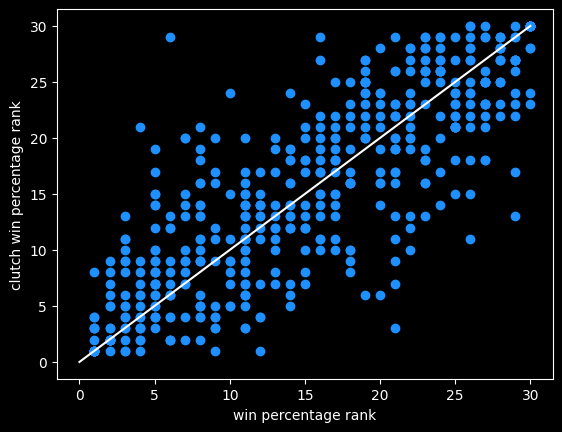

In [125]:
plt.scatter(merged_data.W_PCT_RANK, merged_data.W_PCT_RANK_CLUTCH, color='dodgerblue')
plt.xlabel('win percentage rank')
plt.ylabel('clutch win percentage rank')


_out = plt.plot([0,30], [0,30], color="white")

ok, I need to be plotting the density of each dot.

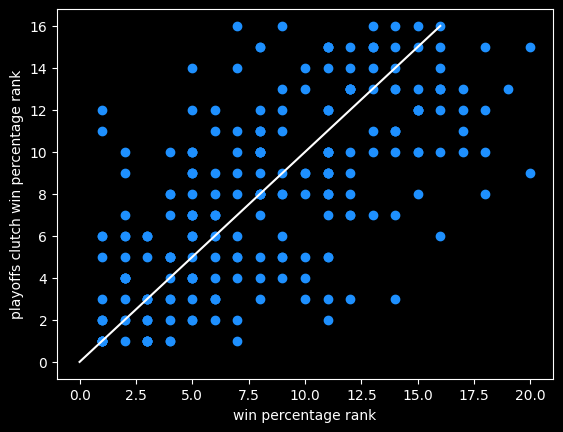

In [126]:
plt.scatter(merged_with_playoffs.W_PCT_RANK, merged_with_playoffs.W_PCT_RANK_PLAYOFF, color='dodgerblue')
plt.xlabel('win percentage rank')
plt.ylabel('playoffs clutch win percentage rank')


_out = plt.plot([0,16], [0,16], color="white")


C:\Users\casey\AppData\Local\Temp\ipykernel_6044\910126802.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=merged_with_playoffs, x="W_PCT_RANK_CLUTCH", y="W_PCT_RANK", cbar=True, palette=palette)


<Axes: xlabel='W_PCT_RANK_CLUTCH', ylabel='W_PCT_RANK'>

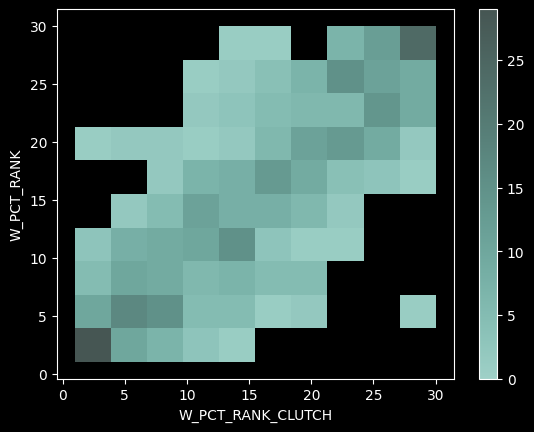

In [127]:
import seaborn as sns
# g = sns.JointGrid(data=merged_with_playoffs, x="W_PCT_RANK_CLUTCH", y="W_PCT_RANK_PLAYOFF")
# g.plot_joint(sns.histplot)

palette = sns.color_palette("rocket_r")
sns.histplot(data=merged_with_playoffs, x="W_PCT_RANK_CLUTCH", y="W_PCT_RANK", cbar=True, palette=palette)


In [130]:
has_playoffs = merged_with_playoffs[~merged_with_playoffs.W_PCT_RANK_PLAYOFF.isna()]

teams tend to have clutch winning percentages close to their overall winning percentages.

it might be worth computing winning percentage in non-clutch games. when is there a significant difference between record in clutch vs. non-clutch games?

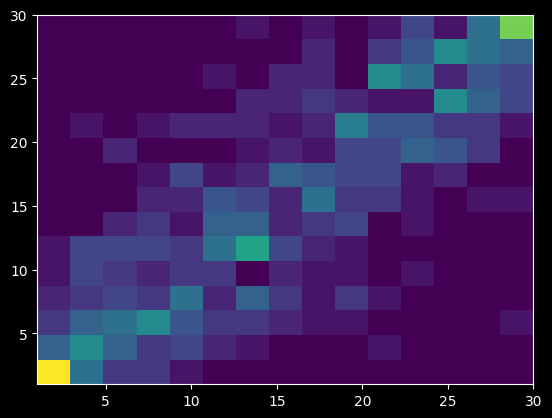

In [138]:
_out = plt.hist2d(merged_with_playoffs.W_PCT_RANK_CLUTCH, merged_with_playoffs.W_PCT_RANK, bins=15)

In [131]:
has_playoffs.loc[has_playoffs.W_PCT_RANK_CLUTCH < 4, ['TEAM_NAME', "SEASON", 'W_CLUTCH', 'W_PCT_RANK_CLUTCH','W_PLAYOFF','W_PCT_RANK_PLAYOFF']]

,TEAM_NAME,SEASON,W_CLUTCH,W_PCT_RANK_CLUTCH,W_PLAYOFF,W_PCT_RANK_PLAYOFF
3,Chicago Bulls,10,31,1,9,3
5,Dallas Mavericks,10,34,3,16,1
26,San Antonio Spurs,10,26,2,2,9
33,Chicago Bulls,11,22,1,2,11
42,Los Angeles Lakers,11,31,2,5,9
56,San Antonio Spurs,11,22,3,10,1
62,Brooklyn Nets,12,26,3,3,8
75,Miami Heat,12,32,1,16,2
86,San Antonio Spurs,12,28,2,15,1
101,Indiana Pacers,13,26,2,10,4


here are the clutch win percentages for each NBA champion. They tend to be good teams that don't have a lot of clutch games in the regular season. 

The 2020 Bucks and 2021 Warriors were both outside the top 10 for clutch win percentage.

In [132]:
champs = merged_with_playoffs[merged_with_playoffs.W_PLAYOFF == 16]
champs[['TEAM_NAME', "SEASON",'W_RANK_CLUTCH','W_PCT_RANK_CLUTCH','W_PLAYOFF']]

,TEAM_NAME,SEASON,W_RANK_CLUTCH,W_PCT_RANK_CLUTCH,W_PLAYOFF
5,Dallas Mavericks,10,1,3,16
44,Miami Heat,11,10,7,16
75,Miami Heat,12,1,1,16
116,San Antonio Spurs,13,15,1,16
129,Golden State Warriors,14,9,1,16
155,Cleveland Cavaliers,15,20,9,16
189,Golden State Warriors,16,25,3,16
219,Golden State Warriors,17,20,3,16
267,Toronto Raptors,18,9,5,16
283,Los Angeles Lakers,19,9,4,16


In [133]:
champs.W_PCT_RANK_CLUTCH.describe()

count    15.000000
mean      5.333333
std       4.966555
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      20.000000
Name: W_PCT_RANK_CLUTCH, dtype: float64

In [139]:
champs.W_PCT_RANK.describe()


count    15.000000
mean      2.600000
std       1.723783
min       1.000000
25%       1.000000
50%       3.000000
75%       3.500000
max       7.000000
Name: W_PCT_RANK, dtype: float64

what are the number of clutch games by season?


In [136]:
season_grouper = merged_with_playoffs.groupby('SEASON')

season_grouper['W_CLUTCH'].sum() / season_grouper['W'].sum()

SEASON
10    0.542276
11    0.516162
12    0.522376
13    0.522764
14    0.506504
15    0.517886
16    0.522764
17    0.517073
18    0.504065
19    0.510859
20    0.482407
21    0.482927
22    0.511382
23    0.461789
24    0.455285
25    0.479853
dtype: float64





### unedited bELOW HERE

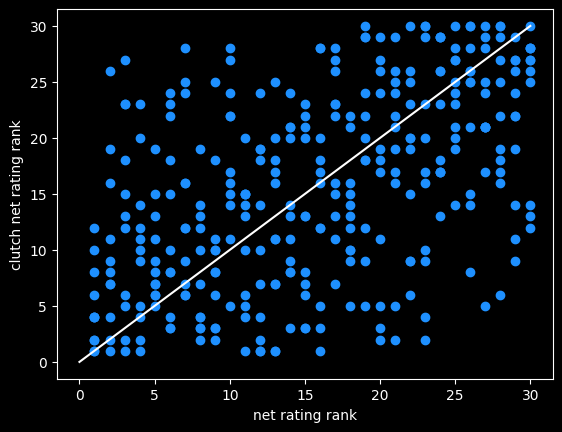

In [44]:
plt.scatter(merged_data.NET_RATING_RANK, merged_data.NET_RATING_RANK_CLUTCH, color='dodgerblue')
plt.xlabel('net rating rank')
plt.ylabel('clutch net rating rank')


_out = plt.plot([0,30], [0,30], color="white")

very good and very bad teams are going to have fewer games played in the clutch. mediocre teams should be involved in the most number of clutch games.

Text(0, 0.5, 'clutch games rank')

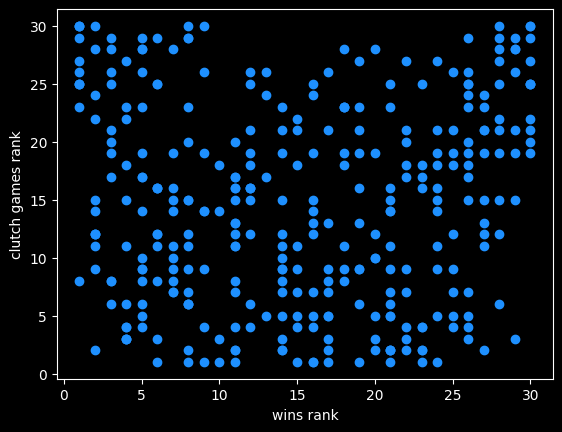

In [47]:
plt.scatter(merged_data.W_RANK, merged_data.GP_RANK_CLUTCH, color='dodgerblue')
plt.xlabel('wins rank')
plt.ylabel('clutch games rank')


#_out = plt.plot([0,30], [0,30], color="white")

bad teams tend to play in more clutch games than good teams.

In [56]:
merged_data.W_RANK.corr(merged_data.GP_RANK_CLUTCH, method='spearman')

np.float64(0.04063161828092987)

not the best viz. just look at top teams


In [48]:
top_teams = merged_data[merged_data.W_RANK < 6]

In [50]:
top_teams.GP_RANK_CLUTCH.describe()

count    62.000000
mean     17.209677
std       9.138528
min       2.000000
25%       9.000000
50%      17.500000
75%      25.750000
max      30.000000
Name: GP_RANK_CLUTCH, dtype: float64

What about teams with a good record that played in a lot of clutch games?

In [54]:
hmm_teams = top_teams[top_teams.GP_RANK_CLUTCH < 9]
hmm_teams[['TEAM_NAME', 'SEASON', 'W_RANK', 'GP_RANK_CLUTCH', 'W_RANK_CLUTCH']]

,TEAM_NAME,SEASON,W_RANK,GP_RANK_CLUTCH,W_RANK_CLUTCH
27,Toronto Raptors,15,4,3,1
31,Boston Celtics,16,4,4,1
57,Toronto Raptors,16,5,4,7
61,Boston Celtics,17,4,6,3
82,Philadelphia 76ers,17,5,8,5
97,Denver Nuggets,18,4,4,1
121,Boston Celtics,19,5,5,6
152,Brooklyn Nets,20,4,3,1
189,Golden State Warriors,21,3,8,8
203,Phoenix Suns,21,1,8,1


how well do clutchier-than-expected teams do in the playoffs?